I am trying to remove the seasonal cycle by averaging every Jan, Feb..Dec from 1982-2017 and then subtract that from the dataset to view the anomalies. When I try to subtract the monthly averages from the dataset I always seem to get an array with 0 in the time dimension. I'm not sure what is going wrong

In [31]:
import xarray 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib import cm
from random import random
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
ds = xarray.open_dataset('/g/data/e14/jt8205/HadISST/HadISST_sst.nc.gz')

In [52]:
sst = ds.sst.sel(time=slice('1982-01-16T12:00:00','2017-12-16T12:00:00'))

These are the two methods I've found that should average the data, but go about it a slighly different way

In [62]:
#monthly_average_sst = sst.groupby('time.month').mean(dim='time')

OR

In [63]:
monthly_average_sst= sst.resample(time='1MS').mean(dim='time')

In [64]:
monthly_average_sst.dims, monthly_average_sst.shape

(('time', 'latitude', 'longitude'), (432, 180, 360))

In [65]:
sst.dims, sst.shape

(('time', 'latitude', 'longitude'), (432, 180, 360))

In [66]:
sst_anom = sst - monthly_average_sst

In [67]:
#anomalies = sst.groupby("time.month") - monthly_average_sst

Get a 0 in the time dimension

In [68]:
sst_anom.dims, sst_anom.shape

(('time', 'latitude', 'longitude'), (0, 180, 360))

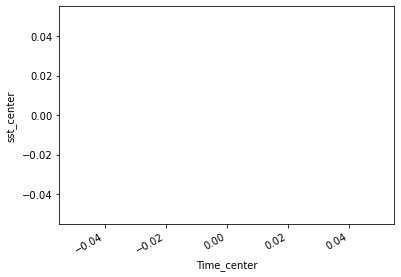

In [69]:
sst_anom.mean(dim=('latitude','longitude')).plot()

Look at the anomalies for a particular event

In [70]:
sst_anom_mhw48=sst_anom.sel(time=slice('2014-01-16T12:00:00','2016-06-16T12:00:00')).sel(longitude=slice(-145,-100), latitude = slice(-32,-57))

In [71]:
sst_anom_mhw48

<xarray.DataArray 'sst' (time: 0, latitude: 25, longitude: 45)>
array([], shape=(0, 25, 45), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 
  * latitude   (latitude) float32 -32.5 -33.5 -34.5 -35.5 ... -54.5 -55.5 -56.5
  * longitude  (longitude) float32 -144.5 -143.5 -142.5 ... -102.5 -101.5 -100.5

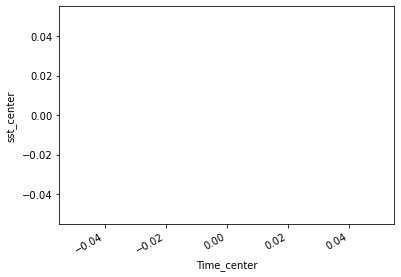

In [72]:
sst_anom_mhw48.mean(dim=('latitude','longitude')).plot()